# M06_S2_Teknikal_WebScraping

# Preparation



In [1]:
# download dan instal modul yang dibutuhkan

# Uncomment bagian di bawah ini jika dijalankan menggunakan google colab
# !pip install builtwith
# !pip install python-whois

  Created wheel for builtwith: filename=builtwith-1.3.4-py3-none-any.whl size=36097 sha256=e4ec0d6a067dd894b3378427ef35ab99849e75f22bde97b3e7eb4832b6b10c8c
  Stored in directory: /root/.cache/pip/wheels/72/37/d7/ee9677e57e69fec72898a783876aac646c041fa097e3a87631
Successfully built builtwith
     |████████████████████████████████| 91 kB 3.9 MB/s 
  Created wheel for python-whois: filename=python_whois-0.7.3-py3-none-any.whl size=87720 sha256=44062a3e76e2ee4a51219d8426f2485e21f66c9dc555eb40a2c8eec3b9f3b245
  Stored in directory: /root/.cache/pip/wheels/11/05/f7/895ce5a73665f77c8274a7d55e34fb3e6b4abbb9a7637e215b
Successfully built python-whois


In [2]:
# Import Library yang dibutuhkan

import urllib3
from bs4 import BeautifulSoup
import builtwith
import whois

## 1. robots.txt
Cari website target, lalu cek robots.txt website


In [3]:
#Cek robot.txt dari website target

# Creating a PoolManager instance for sending requests.
http = urllib3.PoolManager()
urllib3.disable_warnings() #disable annoying warnings
# Sending a GET request and getting back response as HTTPResponse object.
resp = http.request("GET", "https://quotes.toscrape.com/robots.txt")
# Print the returned data.
print(resp.data)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>404 Not Found</title>\n<h1>Not Found</h1>\n<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>\n'


In [4]:
#contoh sukses
html = http.request("GET", 'http://pythonscraping.com/robots.txt')
print(html.data)

b'#\n# robots.txt\n#\n# This file is to prevent the crawling and indexing of certain parts\n# of your site by web crawlers and spiders run by sites like Yahoo!\n# and Google. By telling these "robots" where not to go on your site,\n# you save bandwidth and server resources.\n#\n# This file will be ignored unless it is at the root of your host:\n# Used:    http://example.com/robots.txt\n# Ignored: http://example.com/site/robots.txt\n#\n# For more information about the robots.txt standard, see:\n# http://www.robotstxt.org/robotstxt.html\n#\n# For syntax checking, see:\n# http://www.frobee.com/robots-txt-check\n\nUser-agent: *\nCrawl-delay: 10\n# Directories\nDisallow: /includes/\nDisallow: /misc/\nDisallow: /modules/\nDisallow: /profiles/\nDisallow: /scripts/\nDisallow: /themes/\n# Files\nDisallow: /CHANGELOG.txt\nDisallow: /cron.php\nDisallow: /INSTALL.mysql.txt\nDisallow: /INSTALL.pgsql.txt\nDisallow: /INSTALL.sqlite.txt\nDisallow: /install.php\nDisallow: /INSTALL.txt\nDisallow: /LICEN

## 2. Web size
Estimasi ukuran website dengan searching di google menggunakan site:https://quotes.toscrape.com/
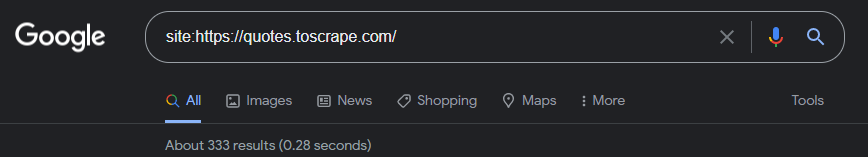

## 3. Builtwith
Cek teknologi website dibuat menggunakan library builtwith


In [5]:
#Cek teknologi website dibuat menggunakan library builtwith

builtwith.parse('https://quotes.toscrape.com/')

{'web-frameworks': ['Twitter Bootstrap'], 'web-servers': ['Nginx']}

## 4. Whois
Cek pemilik website menggunakan protokol whois dengan library python-whois

In [6]:
#Cek pemilik website menggunakan protokol whois dengan library python-whois

print(whois.whois('https://quotes.toscrape.com/'))

{
  "domain_name": [
    "TOSCRAPE.COM",
    "toscrape.com"
  ],
  "registrar": "Amazon Registrar, Inc.",
  "whois_server": "whois.registrar.amazon.com",
  "referral_url": null,
  "updated_date": [
    "2021-05-25 22:54:15",
    "2021-05-25 22:54:16.257000"
  ],
  "creation_date": "2016-06-28 20:26:52",
  "expiration_date": "2022-06-28 20:26:52",
  "name_servers": [
    "NS-1192.AWSDNS-21.ORG",
    "NS-1782.AWSDNS-30.CO.UK",
    "NS-437.AWSDNS-54.COM",
    "NS-740.AWSDNS-28.NET",
    "ns-1192.awsdns-21.org",
    "ns-1782.awsdns-30.co.uk",
    "ns-437.awsdns-54.com",
    "ns-740.awsdns-28.net"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "renewPeriod https://icann.org/epp#renewPeriod"
  ],
  "emails": [
    "abuse@amazonaws.com",
    "owner-1961310@toscrape.com.whoisprivacyservice.org",
    "admin-1961310@toscrape.com.whoisprivacyservice.org",
    "tech-1961310@toscrape.com.whoisprivacyservice.org"
  ],
  "dnssec": "unsigned",
  "

## 5. Web page Analysis
menggunakan inspect untuk mengetahui class author.
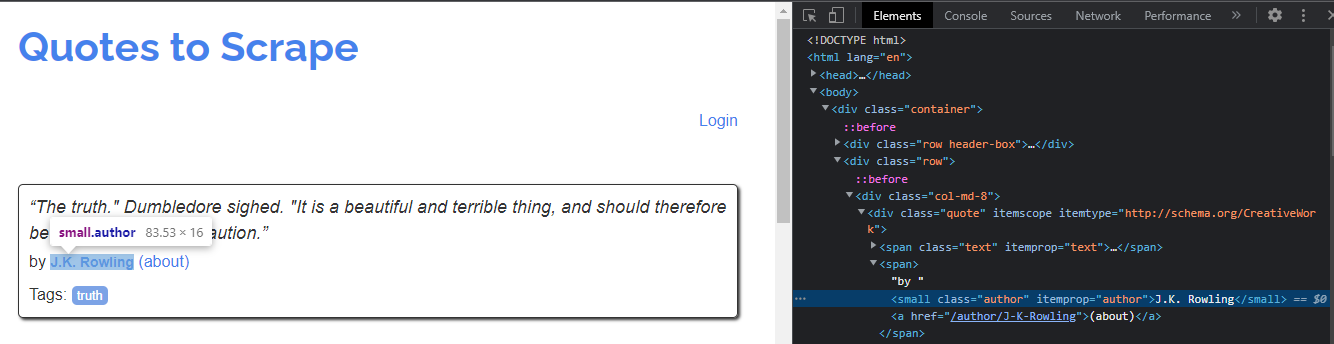

# Static Web Scraping

## Single Page

In [7]:
#Scrap entire page
html = http.request("GET", 'https://quotes.toscrape.com/')
print(html.data)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\xe2\x80\

In [8]:
#Scrap only <title> tag from page
html = http.request("GET", 'https://quotes.toscrape.com/')
soup = BeautifulSoup(html.data, 'html.parser')
print(soup.title)
print(soup.title.text)

<title>Quotes to Scrape</title>
Quotes to Scrape


In [9]:
#Scrap author class from page
html = http.request("GET", 'https://quotes.toscrape.com/')
soup = BeautifulSoup(html.data, 'html.parser')
author = []
for i in soup.find_all("small", class_="author"):
        author.append(i.get_text(strip=True))
print(author)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin']


In [10]:
#scrap data tertentu menggunakan Regular Expression (Regex)
import re
import urllib.request
response = urllib.request.urlopen('https://quotes.toscrape.com/')
html = response.read()
text = html.decode()
re.findall('<small class="author" itemprop="author">(.*?)</small>',text)

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

## Multiple Pages

In [11]:
page = 1
author = []
urllib3.disable_warnings()

#lakukan looping hingga semua halaman ditelusuri
while page != 11:
      url = f"https://quotes.toscrape.com/page/{page}/"
      req = http.request("GET", url)
      soup = BeautifulSoup(req.data, 'html.parser')
      for i in soup.find_all("small", class_="author"):
        author.append(i.get_text(strip=True))
      page = page + 1
set(author) #menampilkan author yang unique

{'Albert Einstein',
 'Alexandre Dumas fils',
 'Alfred Tennyson',
 'Allen Saunders',
 'André Gide',
 'Ayn Rand',
 'Bob Marley',
 'C.S. Lewis',
 'Charles Bukowski',
 'Charles M. Schulz',
 'Douglas Adams',
 'Dr. Seuss',
 'E.E. Cummings',
 'Eleanor Roosevelt',
 'Elie Wiesel',
 'Ernest Hemingway',
 'Friedrich Nietzsche',
 'Garrison Keillor',
 'George Bernard Shaw',
 'George Carlin',
 'George Eliot',
 'George R.R. Martin',
 'Harper Lee',
 'Haruki Murakami',
 'Helen Keller',
 'J.D. Salinger',
 'J.K. Rowling',
 'J.M. Barrie',
 'J.R.R. Tolkien',
 'James Baldwin',
 'Jane Austen',
 'Jim Henson',
 'Jimi Hendrix',
 'John Lennon',
 'Jorge Luis Borges',
 'Khaled Hosseini',
 "Madeleine L'Engle",
 'Marilyn Monroe',
 'Mark Twain',
 'Martin Luther King Jr.',
 'Mother Teresa',
 'Pablo Neruda',
 'Ralph Waldo Emerson',
 'Stephenie Meyer',
 'Steve Martin',
 'Suzanne Collins',
 'Terry Pratchett',
 'Thomas A. Edison',
 'W.C. Fields',
 'William Nicholson'}

# Menyimpan data

## File media
Gambar, video, dsb.

In [12]:
#download image jika sudah diketahui url nya
url = "https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"
r = http.request("GET", url)

#save as jpg file
with open("book.jpg",'wb') as f:
   f.write(r.data)
   f.close()

## Export hasil scraping

In [13]:
#Scrap only <title> tag from page
html = http.request("GET", 'https://quotes.toscrape.com/')
soup = BeautifulSoup(html.data, 'html.parser')
result = soup.title.text

#save as txt file
with open("result.txt",'w') as f:
   f.write(str(result))
   f.close()

# Latihan

1. Lakukan langkah persiapan untuk scrap web https://books.toscrape.com/
2. Scrap https://books.toscrape.com/ untuk mencari info harga buku berdasarkan input user, dengan judul buku yang anda suka!
3. Tuliskan judul buku untuk rating >= 3 star

# Thank You!!